In [82]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from ipywidgets import interactive
from matplotlib import cm
#from numpy import genfromtxt

In [83]:
 #reading input files
# x_data = pd.read_csv('./Data/q1/linearX.csv')
# y_data = pd.read_csv('./Data/q1/linearY.csv')

#  making DataFrame
# df = pd.concat([x_data, y_data], axis=1)

In [84]:
#reading data
x_data_orig = np.genfromtxt('./Data/q1/linearX.csv', delimiter=',')
# standardization of data
x_1 = (x_data_orig - np.mean(x_data_orig))/ np.std(x_data_orig)
# for intercept term
x_0 = np.ones(len(x_1))
# stack row wise to get x, each column now represents one example
x = np.row_stack((x_1,x_0))
y = np.genfromtxt('./Data/q1/linearY.csv', delimiter=',').reshape(len(x_1),1)

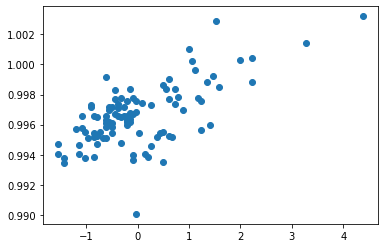

In [85]:
# plot data
## standardized data
plt.scatter(x_1, y)
plt.show()

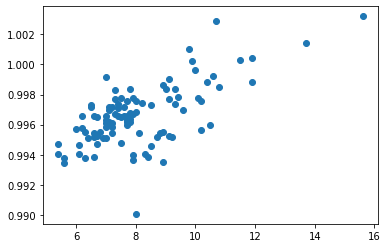

In [86]:
# original data
plt.scatter(x_data_orig, y)
plt.show()

In [87]:
# sanity check
print(len(x_1), len(x_0), y.shape, x.shape)

100 100 (100, 1) (2, 100)


### LINEAR REGRESSION WITH BATCH GRADIENT DESCENT

In [88]:
# function to calculate J(theta)
def cost_function(Y, theta, X):
    #number of examples for taking average
    m = X.shape[1]
    Y_hat = np.dot(X.T, theta)
    #computing mse loss
    J_theta = (1/(2*m)) * np.sum((Y - Y_hat)**2, axis=0)
    return J_theta

In [89]:
# function to calculate gradient
def gradient(theta, X, Y):
    #number of examples for taking average
    m = X.shape[1]
    Y_hat = np.dot(X.T, theta)
    #computing gradient of mse loss
    grad_vector = (-1/m)* np.dot(X,(Y - Y_hat))
    return grad_vector

In [90]:
# linear regression
def linear_regression(X, Y, learning_rate=0.1, delta= 0.0000000001):
    # initializing theta parameter with all zeros
    theta = np.random.rand(X.shape[0], 1) # np.zeros((X.shape[0], 1)) #
    time_step = 0
    #for now keeping epochs as stopping criteria
    J_theta_t = cost_function(Y, theta, X)
    #lists to track values of theta and corresponding cost for plots
    error_tracker = [J_theta_t]
    theta_1_tracker = [theta[0][0]]
    theta_0_tracker = [theta[1][0]]
    
    while(1): 
        print("Cost at ", time_step, ":", J_theta_t)
        theta = theta - learning_rate * gradient(theta, X, Y)
        J_theta_t_plus_1 = cost_function(Y, theta, X)
        #push in tracking lists for plots
        error_tracker.append(J_theta_t_plus_1)
        theta_1_tracker.append(theta[0][0])
        theta_0_tracker.append(theta[1][0])
        #stopping criteria
        if(abs(J_theta_t - J_theta_t_plus_1) <= delta):
            break
        #if(np.linalg.norm(gradient(theta, X, Y), ord=1, axis=None, keepdims=False) < 0.00001)
        #update J_theta_t to J_theta_t_plus_1
        J_theta_t = J_theta_t_plus_1
        time_step += 1
        
    return theta, error_tracker, theta_1_tracker, theta_0_tracker   
    

In [91]:
final_theta, error_vals, theta_1_vals, theta_0_vals = linear_regression(x, y)
error_vals = np.array(error_vals)
theta_1_vals = np.array(theta_1_vals)
theta_0_vals = np.array(theta_0_vals)
y_hat = np.dot(x.T, final_theta)

Cost at  0 : [0.18305154]
Cost at  1 : [0.14827197]
Cost at  2 : [0.12010052]
Cost at  3 : [0.09728165]
Cost at  4 : [0.07879836]
Cost at  5 : [0.0638269]
Cost at  6 : [0.05170002]
Cost at  7 : [0.04187724]
Cost at  8 : [0.03392079]
Cost at  9 : [0.02747607]
Cost at  10 : [0.02225584]
Cost at  11 : [0.01802746]
Cost at  12 : [0.01460247]
Cost at  13 : [0.01182823]
Cost at  14 : [0.00958109]
Cost at  15 : [0.00776091]
Cost at  16 : [0.00628656]
Cost at  17 : [0.00509234]
Cost at  18 : [0.00412503]
Cost at  19 : [0.0033415]
Cost at  20 : [0.00270684]
Cost at  21 : [0.00219277]
Cost at  22 : [0.00177637]
Cost at  23 : [0.00143909]
Cost at  24 : [0.00116589]
Cost at  25 : [0.0009446]
Cost at  26 : [0.00076535]
Cost at  27 : [0.00062016]
Cost at  28 : [0.00050256]
Cost at  29 : [0.0004073]
Cost at  30 : [0.00033014]
Cost at  31 : [0.00026764]
Cost at  32 : [0.00021701]
Cost at  33 : [0.00017601]
Cost at  34 : [0.00014279]
Cost at  35 : [0.00011589]
Cost at  36 : [9.40981071e-05]
Cost at  37

### PLOTS 

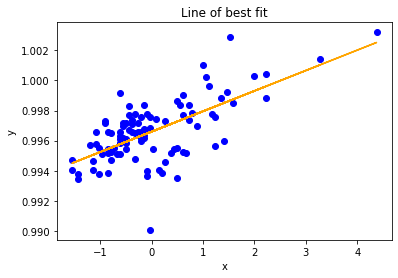

In [92]:
plt.title('Line of best fit')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x_1, y, color='blue')
plt.plot(x_1, y_hat, color='orange')
plt.show()

In [93]:
def f(theta_1_vals, theta_0_vals, x, y):
    m = x.shape[1]
    error = []
    for i in range(theta_1_vals.shape[0]):
        error_i = []
        for j in range(theta_1_vals.shape[1]):
            theta_1 = theta_1_vals[i][j]
            theta_0 = theta_0_vals[i][j]
            theta = np.row_stack((theta_1,theta_0))
            y_hat = np.dot(x.T, theta)
            J_theta = (1/(2*m)) * np.sum((y - y_hat)**2, axis=0)
            error_i.append(np.squeeze(J_theta, axis=None))
        error.append(error_i)
    return np.array(error)

In [94]:
def animate(i):
    line.set_3d_properties(dataSet[2, :num])    # update the data.
    return line,

In [95]:
def plot(elevation, angle):
    #setting up the figure size
    fig = plt.figure(figsize = [12, 15])
    #setting up the axes as a 3 dimensional plot
    ax = fig.gca(projection = '3d')
    #plot the surface
    ax.plot3D(theta_1_vals.flatten(), theta_0_vals.flatten(), error_vals.flatten(), 'red', marker='o')
    #ax.plot_surface(theta_1, theta_0, error, cmap=cm.coolwarm)
    ax.set_xlabel('theta_1') 
    ax.set_ylabel('theta_0')
    ax.set_zlabel('J(theta)')   
    ax.view_init(elev=elevation, azim=angle)
    
    ani = animation.FuncAnimation(
    fig, animate, interval=20, blit=True, save_count=50)
    
    ax.set_title('Surface Plot of Variation of J(theta) on Changing theta_1 and theta_0 Parameters')
    plt.show()

In [96]:
theta_1 = np.linspace(-1, 1, 100)
theta_0 = np.linspace(0, 2, 100)
theta_1, theta_0 = np.meshgrid(theta_1, theta_0)
error = f(theta_1, theta_0, x, y)
print(len(theta_1_vals), len(theta_0_vals), len(error_vals))
iplot = interactive(plot, elevation= (-90, 90, 5), angle = (-90, 90, 5))
iplot
#plot(40, 75)

96 96 96


interactive(children=(IntSlider(value=0, description='elevation', max=90, min=-90, step=5), IntSlider(value=0,…

In [97]:
print(theta_1.shape, theta_0.shape)

(100, 100) (100, 100)


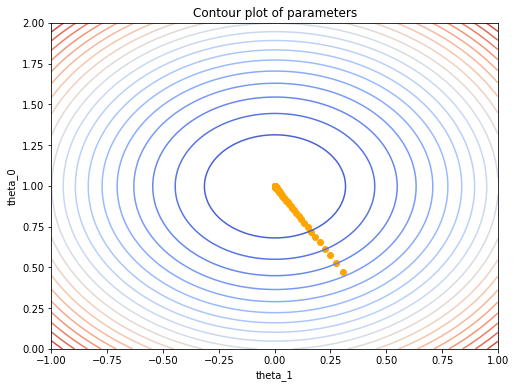

In [98]:
fig = plt.figure(figsize = [8, 6])
plt.title('Contour plot of parameters')
plt.xlabel('theta_1')
plt.ylabel('theta_0')
plt.contour(theta_1, theta_0, error, 20, cmap='coolwarm')
plt.scatter(theta_1_vals, theta_0_vals, color='orange')
plt.show()

### ROUGH 

In [99]:
from sklearn.linear_model import LinearRegression

In [100]:
clf = LinearRegression()
clf.fit(x_1.reshape((len(x_1),1)), y)

LinearRegression()

In [101]:
clf.coef_, clf.intercept_

(array([[0.0013402]]), array([0.9966201]))

In [102]:
final_theta

array([[0.0013539 ],
       [0.99659659]])

### REFERENCES

1. https://towardsdatascience.com/an-easy-introduction-to-3d-plotting-with-matplotlib-801561999725
2. https://www.youtube.com/watch?v=xd2sZ8rXLZI
3. https://medium.com/@rohitadnaik/3d-line-plot-in-python-2fbeca99b9ba
4. https://www.google.com/search?client=safari&rls=en&q=3d+plots+matplotlib+label+axes&ie=UTF-8&oe=UTF-8
5. https://matplotlib.org/stable/gallery/animation/simple_anim.html
6. https://plotly.com/python/3d-surface-plots/

### PLOTLY

In [114]:
def f(theta_1_vals, theta_0_vals, x, y):
    m = x.shape[1]
    error = []
    for i in range(theta_1_vals.shape[0]):
        error_i = []
        for j in range(theta_0_vals.shape[0]):
            theta_1 = theta_1_vals[i]
            theta_0 = theta_0_vals[i]
            theta = np.row_stack((theta_1,theta_0))
            y_hat = np.dot(x.T, theta)
            J_theta = (1/(2*m)) * np.sum((y - y_hat)**2, axis=0)
            error_i.append(np.squeeze(J_theta, axis=None))
        error.append(error_i)
    return np.array(error)

In [115]:
theta_1 = np.linspace(-1, 1, 100)
theta_0 = np.linspace(0, 2, 100)
error = f(theta_1, theta_0, x, y)

In [113]:
theta_1[1]

-0.9797979797979798

In [127]:
# import plotly.graph_objects as go

# plot the surface plot with plotly's Surface
fig = go.Figure(data=[go.Surface(z=error,x=theta_1,y=theta_0),go.Scatter3d(x=theta_1_vals, y=theta_0_vals, z=error_vals,
                                   mode='markers')])

# add a countour plot
# fig.update_traces(contours_z=dict(show=True, usecolormap=True,
#                                   highlightcolor="limegreen", project_z=True))
#add animated line
# line_marker = dict(color='#101010', width=4)
# fig.add_scatter3d(x=theta_1_vals, y=theta_0_vals, z=error_vals, mode='lines', line=line_marker, name='')

# annotate the plot
fig.update_layout(title='Linear Model MSE Cost Surface',
                  scene=dict(
                    xaxis_title='theta_0 (intercept)',
                    yaxis_title='theta_1 (slope)',
                    zaxis_title='MSE Cost'),
                  width=700, height=700)

In [124]:
xm = np.min(theta_1_vals) - 1.5
xM = np.max(theta_1_vals) + 1.5
ym = np.min(theta_0_vals) - 1.5
yM = np.max(theta_0_vals) + 1.5
N = 50
s = np.linspace(-1, 1, N)
xx = s + s ** 2
yy = s - s ** 2


# Create figure
fig = go.Figure(
    data=[go.Scatter(x=theta_1_vals, y=theta_0_vals,
                     mode="lines",
                     line=dict(width=2, color="blue")),
          go.Scatter(x=theta_1_vals, y=theta_0_vals,
                     mode="lines",
                     line=dict(width=2, color="blue"))],
    layout=go.Layout(
        xaxis=dict(range=[xm, xM], autorange=False, zeroline=False),
        yaxis=dict(range=[ym, yM], autorange=False, zeroline=False),
        title_text="Kinematic Generation of a Planar Curve", hovermode="closest",
        updatemenus=[dict(type="buttons",
                          buttons=[dict(label="Play",
                                        method="animate",
                                        args=[None])])]),
    frames=[go.Frame(
        data=[go.Scatter(
            x=[xx[k]],
            y=[yy[k]],
            mode="markers",
            marker=dict(color="red", size=10))])

        for k in range(N)]
)

fig.show()